In [1]:
#Soumik Mukhopadhyay, Roll- 1928127

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)
print('Matplotlib Version',matplotlib.__version__)

Numpy Version 1.20.1
Pandas Version 1.2.4
Seaborn Version 0.11.1
Matplotlib Version 3.3.4


In [4]:
df=pd.read_excel('Sales_Data_EDA.xlsx',sheet_name='Sales')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [6]:
df.head(10).T

0                    1              2  \
CustID                    7000000              7000001        7000002   
AgentBonus                   4409                 2214           4273   
Age                          22.0                 11.0           26.0   
CustTenure                    4.0                  2.0            4.0   
Channel                     Agent  Third Party Partner          Agent   
Occupation               Salaried             Salaried    Free Lancer   
EducationField           Graduate             Graduate  Post Graduate   
Gender                     Female                 Male           Male   
ExistingProdType                3                    4              4   
Designation               Manager              Manager            Exe   
NumberOfPolicy                2.0                  4.0            3.0   
MaritalStatus              Single             Divorced      Unmarried   
MonthlyIncome             20993.0              20130.0        17090.0   
Complaint                       1                    0              1   
ExistingPolicyTenure          2.0                  3.0            2.0   
SumAssured               806761.0             294502.0            NaN   
Zone                        North                North          North   
PaymentMethod         Half Yearly               Yearly         Yearly   
LastMonthCalls                  5                    7              0   
CustCareScore                 2.0                  3.0            3.0   

                                        3               4  \
CustID                            7000003         7000004   
AgentBonus                           1791            2955   
Age                                  11.0             6.0   
CustTenure                            NaN             NaN   
Channel               Third Party Partner           Agent   
Occupation                       Salaried  Small Business   
EducationField                   Graduate              UG   
Gender                            Fe male            Male   
ExistingProdType                        3               3   
Designation                     Executive       Executive   
NumberOfPolicy                        3.0             4.0   
MaritalStatus                    Divorced        Divorced   
MonthlyIncome                     17909.0         18468.0   
Complaint                               1               0   
ExistingPolicyTenure                  2.0             4.0   
SumAssured                       268635.0        366405.0   
Zone                                 West            West   
PaymentMethod                 Half Yearly     Half Yearly   
LastMonthCalls                          0               2   
CustCareScore                         5.0             5.0   

                                        5         6               7         8  \
CustID                            7000005   7000006         7000007   7000008   
AgentBonus                           3252      3850            2073      2719   
Age                                   7.0      12.0             6.0       8.0   
CustTenure                            NaN      23.0             4.0      11.0   
Channel               Third Party Partner     Agent           Agent     Agent   
Occupation                       Salaried  Salaried  Small Business  Salaried   
EducationField                   Graduate  Graduate  Under Graduate  Graduate   
Gender                               Male      Male          Female      Male   
ExistingProdType                        3         4               3         4   
Designation                     Executive        VP       Executive   Manager   
NumberOfPolicy                        2.0       3.0             4.0       3.0   
MaritalStatus                      Single  Divorced       Unmarried  Divorced   
MonthlyIncome                     18068.0   34999.0         17279.0   20916.0   
Complaint                               0         0               0         1   
E

In [7]:
df.describe()

CustID   AgentBonus          Age   CustTenure  ExistingProdType  \
count  4.520000e+03  4520.000000  4251.000000  4294.000000       4520.000000   
mean   7.002260e+06  4077.838274    14.494707    14.469027          3.688938   
std    1.304956e+03  1403.321711     9.037629     8.963671          1.015769   
min    7.000000e+06  1605.000000     2.000000     2.000000          1.000000   
25%    7.001130e+06  3027.750000     7.000000     7.000000          3.000000   
50%    7.002260e+06  3911.500000    13.000000    13.000000          4.000000   
75%    7.003389e+06  4867.250000    20.000000    20.000000          4.000000   
max    7.004519e+06  9608.000000    58.000000    57.000000          6.000000   

       NumberOfPolicy  MonthlyIncome    Complaint  ExistingPolicyTenure  \
count     4475.000000    4284.000000  4520.000000           4336.000000   
mean         3.565363   22890.309991     0.287168              4.130074   
std          1.455926    4885.600757     0.452491              3.346386   
min          1.000000   16009.000000     0.000000              1.000000   
25%          2.000000   19683.500000     0.000000              2.000000   
50%          4.000000   21606.000000     0.000000              3.000000   
75%          5.000000   24725.000000     1.000000              6.000000   
max          6.000000   38456.000000     1.000000             25.000000   

         SumAssured  LastMonthCalls  CustCareScore  
count  4.366000e+03     4520.000000    4468.000000  
mean   6.199997e+05        4.626991       3.067592  
std    2.462348e+05        3.620132       1.382968  
min    1.685360e+05        0.000000       1.000000  
25%    4.394432e+05        2.000000       2.000000  
50%    5.789765e+05        3.000000       3.000000  
75%    7.582360e+05        8.000000       4.000000  
max    1.838496e+06       18.000000       5.000000

In [8]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 4520 
The number of columns (variables) is 20


In [9]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column,': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

Channel :  3
Online                  468
Third Party Partner     858
Agent                  3194
Name: Channel, dtype: int64


Occupation :  5
Free Lancer           2
Laarge Business     153
Large Business      255
Small Business     1918
Salaried           2192
Name: Occupation, dtype: int64


EducationField :  7
MBA                 74
UG                 230
Post Graduate      252
Engineer           408
Diploma            496
Under Graduate    1190
Graduate          1870
Name: EducationField, dtype: int64


Gender :  3
Fe male     325
Female     1507
Male       2688
Name: Gender, dtype: int64


Designation :  6
Exe                127
VP                 226
AVP                336
Senior Manager     676
Executive         1535
Manager           1620
Name: Designation, dtype: int64


MaritalStatus :  4
Unmarried     194
Divorced      804
Single       1254
Married      2268
Name: MaritalStatus, dtype: int64


Zone :  4
South       6
East       64
North    1884
West     2566
Name: Zone, dty

In [10]:
df['Gender'] = df['Gender'].replace(['Fe male'],'Female')
print('Gender',': ',df['Gender'].nunique())
print(df['Gender'].value_counts().sort_values())
print('\n')

Gender :  2
Female    1832
Male      2688
Name: Gender, dtype: int64




In [11]:
df['Occupation'] = df['Occupation'].replace(['Laarge Business'],'Large Business')
print('Occupation',': ',df['Occupation'].nunique())
print(df['Occupation'].value_counts().sort_values())
print('\n')

Occupation :  4
Free Lancer          2
Large Business     408
Small Business    1918
Salaried          2192
Name: Occupation, dtype: int64




In [12]:
df['Designation'] = df['Designation'].replace(['Exe'],'Executive')
print('Designation',': ',df['Designation'].nunique())
print(df['Designation'].value_counts().sort_values())
print('\n')

Designation :  5
VP                 226
AVP                336
Senior Manager     676
Manager           1620
Executive         1662
Name: Designation, dtype: int64




In [13]:
df['EducationField'] = df['EducationField'].replace(['UG'],'Under Graduate ')
print('EducationField',': ',df['EducationField'].nunique())
print(df['EducationField'].value_counts().sort_values())
print('\n')

EducationField :  7
MBA                  74
Under Graduate      230
Post Graduate       252
Engineer            408
Diploma             496
Under Graduate     1190
Graduate           1870
Name: EducationField, dtype: int64




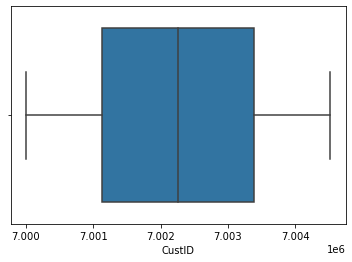

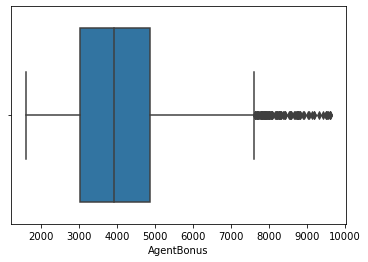

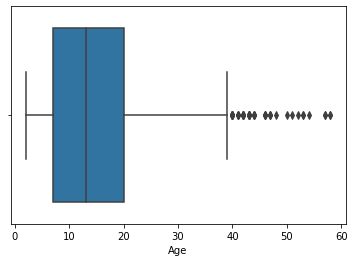

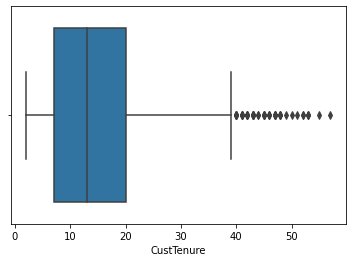

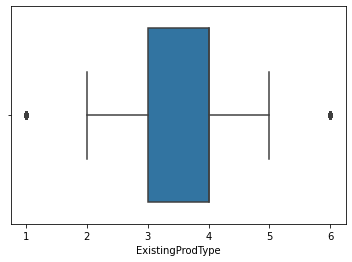

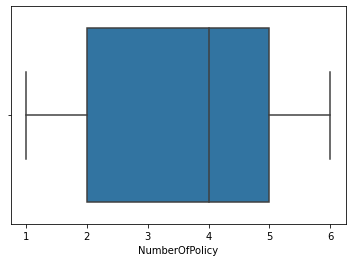

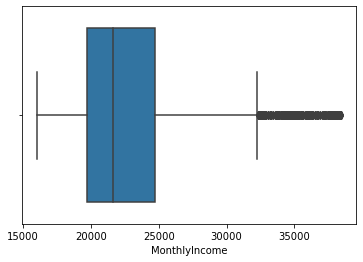

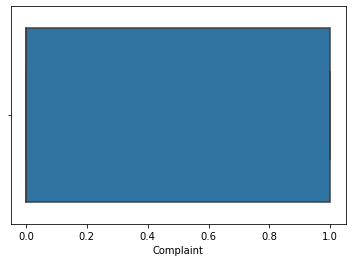

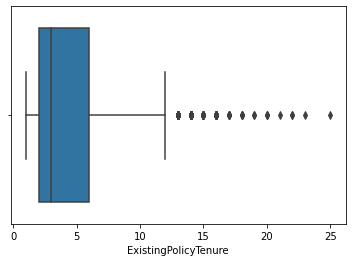

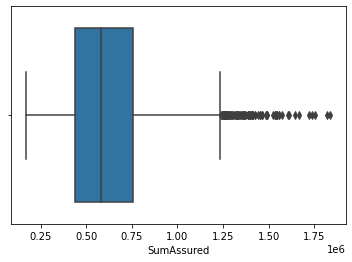

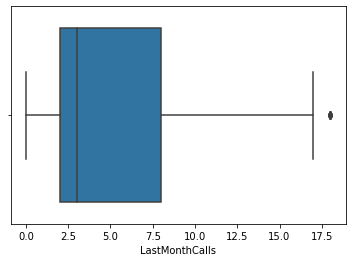

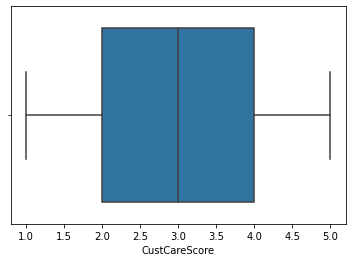

In [14]:
col_names = list(df.select_dtypes(exclude=['object']).columns)
for i,col_val in enumerate(col_names):
    sns.boxplot(df[col_val])
    plt.show()

In [15]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [CustID, AgentBonus, Age, CustTenure, Channel, Occupation, EducationField, Gender, ExistingProdType, Designation, NumberOfPolicy, MaritalStatus, MonthlyIncome, Complaint, ExistingPolicyTenure, SumAssured, Zone, PaymentMethod, LastMonthCalls, CustCareScore]
Index: []

In [16]:
df.isnull().sum()[df.isnull().sum()>0]

Age                     269
CustTenure              226
NumberOfPolicy           45
MonthlyIncome           236
ExistingPolicyTenure    184
SumAssured              154
CustCareScore            52
dtype: int64

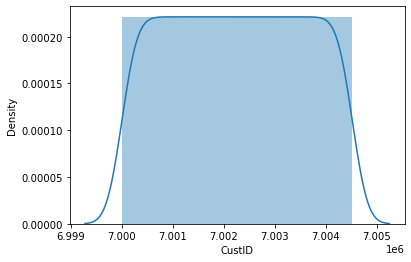

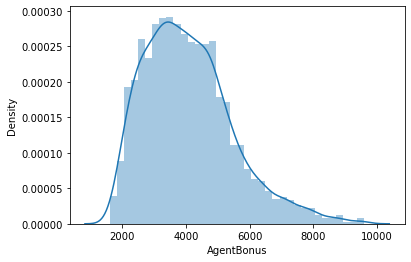

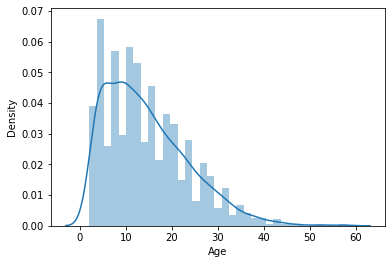

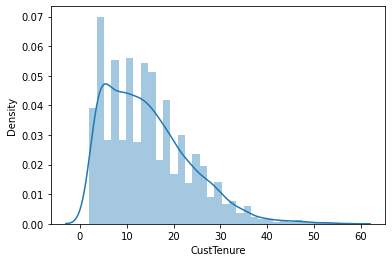

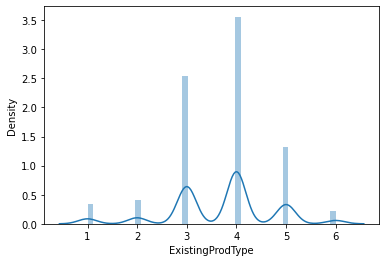

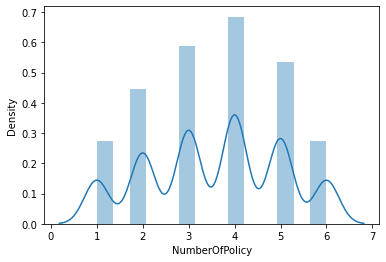

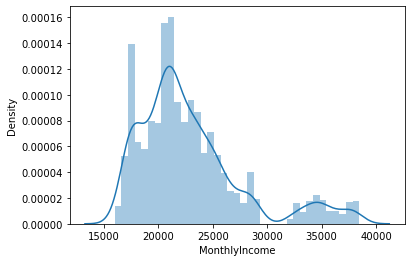

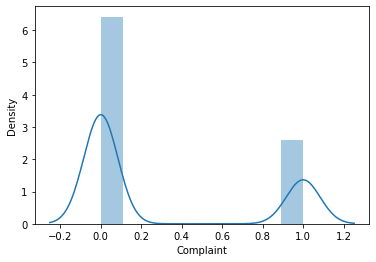

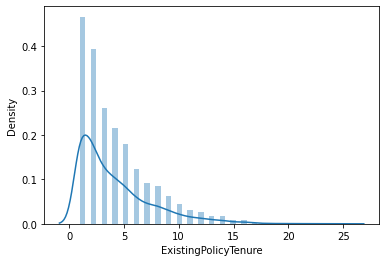

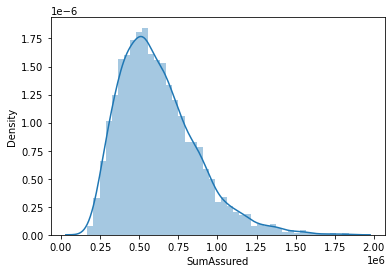

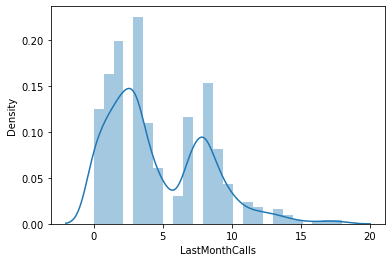

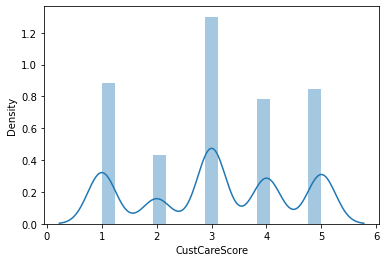

In [17]:
for i,col_val in enumerate(col_names):
    sns.distplot(df[col_val])
    plt.show()

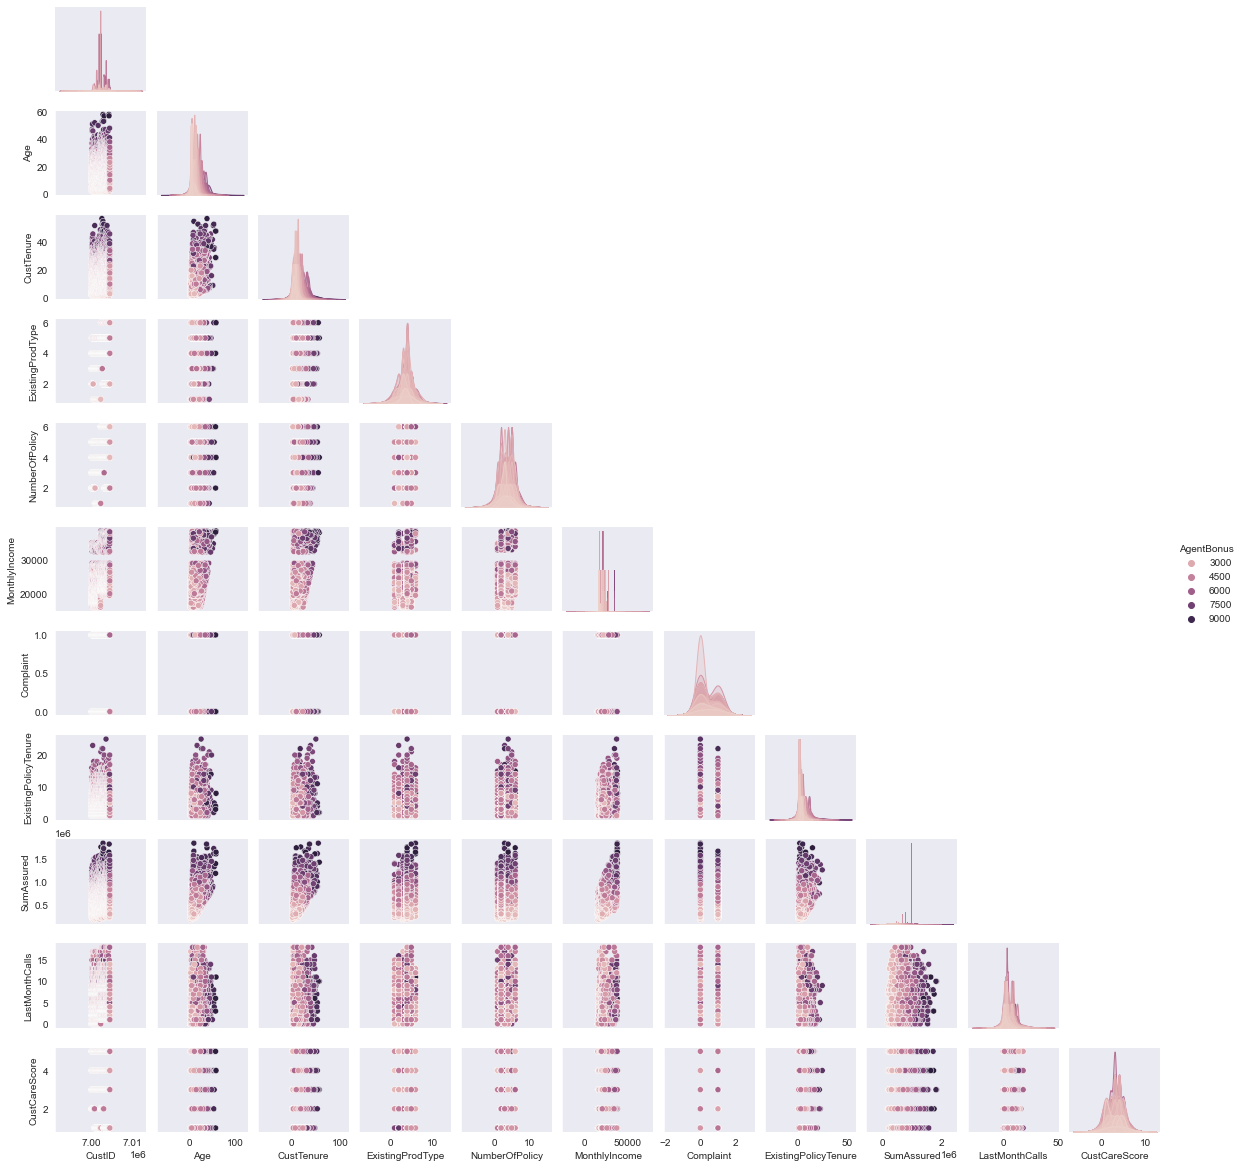

In [18]:
sns.set_style("dark") 
sns.pairplot(df,hue="AgentBonus",height=1.5,aspect=1,corner=True)

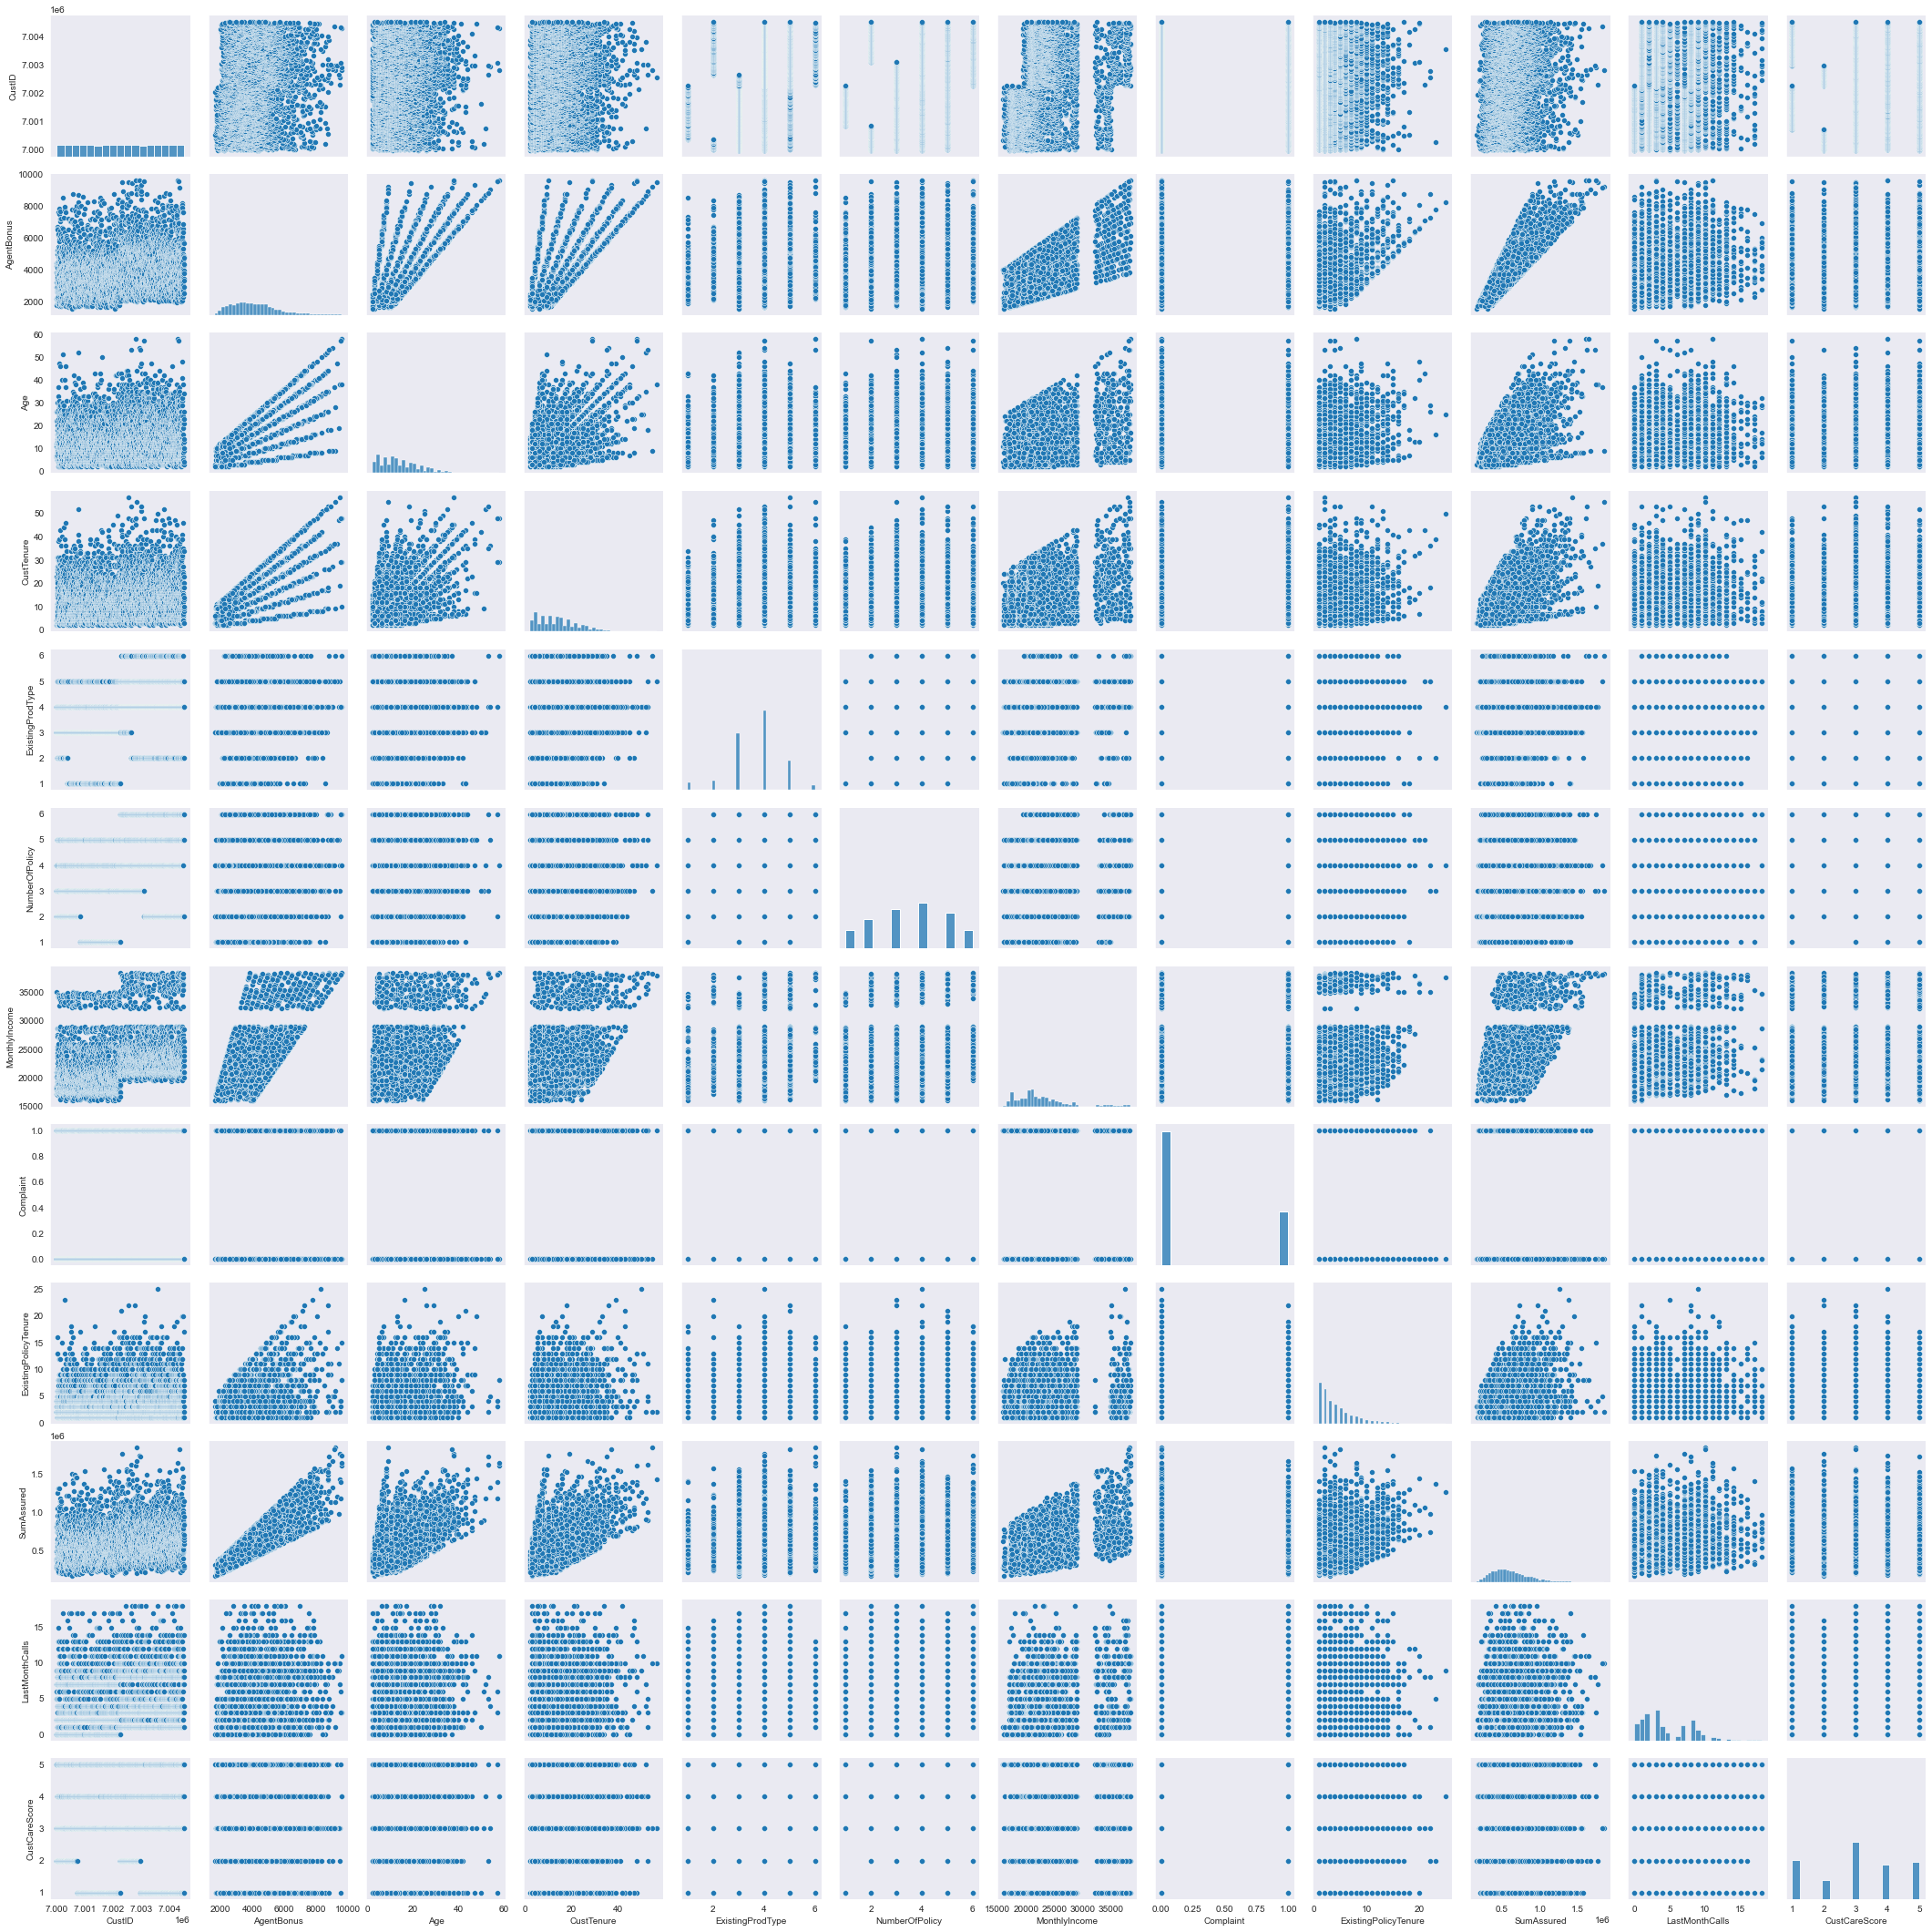

In [19]:
sns.pairplot(df)
plt.show()

In [20]:
df.corr()

CustID  AgentBonus       Age  CustTenure  \
CustID                1.000000    0.192393  0.087781    0.109229   
AgentBonus            0.192393    1.000000  0.559481    0.561344   
Age                   0.087781    0.559481  1.000000    0.328627   
CustTenure            0.109229    0.561344  0.328627    1.000000   
ExistingProdType      0.419359    0.113023  0.070555    0.079891   
NumberOfPolicy        0.255752    0.076448  0.042143    0.045021   
MonthlyIncome         0.308011    0.612196  0.354162    0.344911   
Complaint             0.001921    0.014281  0.021888    0.003807   
ExistingPolicyTenure  0.104306    0.392415  0.216259    0.214984   
SumAssured            0.164116    0.854257  0.474434    0.474610   
LastMonthCalls        0.122144    0.199708  0.114670    0.115993   
CustCareScore        -0.034891    0.022860  0.035694    0.011145   

                      ExistingProdType  NumberOfPolicy  MonthlyIncome  \
CustID                        0.419359        0.255752       0.308011   
AgentBonus                    0.113023        0.076448       0.612196   
Age                           0.070555        0.042143       0.354162   
CustTenure                    0.079891        0.045021       0.344911   
ExistingProdType              1.000000        0.150923       0.198468   
NumberOfPolicy                0.150923        1.000000       0.136518   
MonthlyIncome                 0.198468        0.136518       1.000000   
Complaint                    -0.003486       -0.016416      -0.004510   
ExistingPolicyTenure          0.057066        0.049673       0.215130   
SumAssured                    0.102597        0.060359       0.506208   
LastMonthCalls                0.033191        0.074069       0.359623   
CustCareScore                 0.003813       -0.002265       0.036553   

                      Complaint  ExistingPolicyTenure  SumAssured  \
CustID                 0.001921              0.104306    0.164116   
AgentBonus             0.014281              0.392415    0.854257   
Age                    0.021888              0.216259    0.474434   
CustTenure             0.003807              0.214984    0.474610   
ExistingProdType      -0.003486              0.057066    0.102597   
NumberOfPolicy        -0.016416              0.049673    0.060359   
MonthlyIncome         -0.004510              0.215130    0.506208   
Complaint              1.000000              0.002061   -0.000256   
ExistingPolicyTenure   0.002061              1.000000    0.339366   
SumAssured            -0.000256              0.339366    1.000000   
LastMonthCalls        -0.026320              0.107888    0.156674   
CustCareScore         -0.003835             -0.005679    0.002911   

                      LastMonthCalls  CustCareScore  
CustID                      0.122144      -0.034891  
AgentBonus                  0.199708       0.022860  
Age                         0.114670       0.035694  
CustTenure                  0.115993       0.011145  
ExistingProdType            0.033191       0.003813  
NumberOfPolicy              0.074069      -0.002265  
MonthlyIncome               0.359623       0.036553  
Complaint                  -0.026320      -0.003835  
ExistingPolicyTenure        0.107888      -0.005679  
SumAssured                  0.156674       0.002911  
LastMonthCalls              1.000000       0.005934  
CustCareScore               0.005934       1.000000

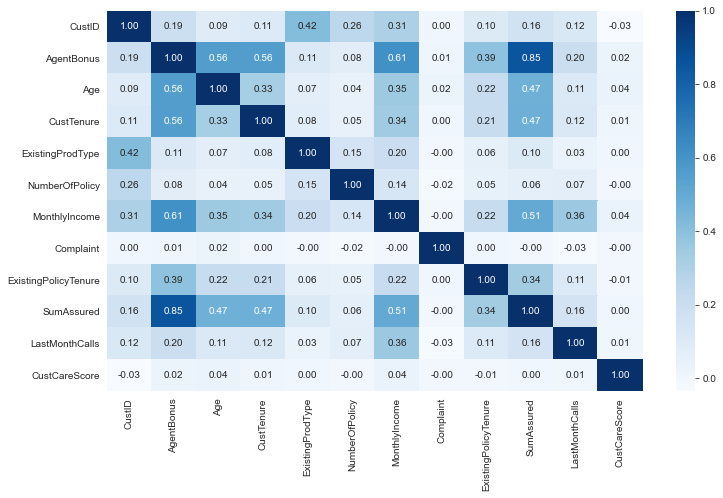

In [21]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

In [22]:
df.drop(['CustID','Age','Occupation','EducationField','Gender','Designation','MaritalStatus'],axis=1,inplace=True)
df

AgentBonus  CustTenure              Channel  ExistingProdType  \
0           4409         4.0                Agent                 3   
1           2214         2.0  Third Party Partner                 4   
2           4273         4.0                Agent                 4   
3           1791         NaN  Third Party Partner                 3   
4           2955         NaN                Agent                 3   
...          ...         ...                  ...               ...   
4515        3953         8.0                Agent                 4   
4516        2939         9.0                Agent                 2   
4517        3792        23.0                Agent                 5   
4518        4816        10.0               Online                 4   
4519        4764        10.0                Agent                 5   

      NumberOfPolicy  MonthlyIncome  Complaint  ExistingPolicyTenure  \
0                2.0        20993.0          1                   2.0   
1                4.0        20130.0          0                   3.0   
2                3.0        17090.0          1                   2.0   
3                3.0        17909.0          1                   2.0   
4                4.0        18468.0          0                   4.0   
...              ...            ...        ...                   ...   
4515             2.0        26355.0          0                   2.0   
4516             2.0        20991.0          0                   3.0   
4517             5.0            NaN          0                   2.0   
4518             2.0        20068.0          0                   6.0   
4519             2.0        23820.0          0                   3.0   

      SumAssured   Zone PaymentMethod  LastMonthCalls  CustCareScore  
0       806761.0  North   Half Yearly               5            2.0  
1       294502.0  North        Yearly               7            3.0  
2            NaN  North        Yearly               0            3.0  
3       268635.0   West   Half Yearly               0            5.0  
4       366405.0   West   Half Yearly               2            5.0  
...          ...    ...           ...             ...            ...  
4515    636473.0   West        Yearly               9            1.0  
4516    296813.0  North        Yearly               1            3.0  
4517    667371.0  North   Half Yearly               4            1.0  
4518    943999.0   West   Half Yearly               1            5.0  
4519    700308.0  North   Half Yearly               1            3.0  

[4520 rows x 13 columns]

In [23]:
df.shape

(4520, 13)

In [24]:
df["Complaint"]= pd.Categorical(df['Complaint'])
df["Channel"]= pd.Categorical(df['Channel'])
df["Zone"]= pd.Categorical(df['Zone'])
df["PaymentMethod"]= pd.Categorical(df['PaymentMethod'])

In [25]:
df.isnull().sum()[df.isnull().sum()>0]

CustTenure              226
NumberOfPolicy           45
MonthlyIncome           236
ExistingPolicyTenure    184
SumAssured              154
CustCareScore            52
dtype: int64

In [26]:
df[df.isnull().sum()[df.isnull().sum()>0].index].dtypes

CustTenure              float64
NumberOfPolicy          float64
MonthlyIncome           float64
ExistingPolicyTenure    float64
SumAssured              float64
CustCareScore           float64
dtype: object

In [27]:
median1=df["CustTenure"].median()
median2=df["NumberOfPolicy"].median()
median3=df["MonthlyIncome"].median()
median4=df["ExistingPolicyTenure"].median()
median5=df["SumAssured"].median()
median6=df["CustCareScore"].median()

df["CustTenure"].replace(np.nan,median1,inplace=True)
df["NumberOfPolicy"].replace(np.nan,median2,inplace=True)
df["MonthlyIncome"].replace(np.nan,median3,inplace=True)
df["ExistingPolicyTenure"].replace(np.nan,median4,inplace=True)
df["SumAssured"].replace(np.nan,median5,inplace=True)
df["CustCareScore"].replace(np.nan,median6,inplace=True)

In [28]:
mode1=df["Complaint"].mode().values[0]
mode2=df["Channel"].mode().values[0]
mode3=df["Zone"].mode().values[0]
mode4=df["PaymentMethod"].mode().values[0]


df["Complaint"]=df["Complaint"].replace(np.nan,mode1)
df["Channel"]= df["Channel"].replace(np.nan,mode2)
df["Zone"]=df["Zone"].replace(np.nan,mode3)
df["PaymentMethod"]=df["PaymentMethod"].replace(np.nan,mode4)


In [29]:
df.isnull().sum()

AgentBonus              0
CustTenure              0
Channel                 0
ExistingProdType        0
NumberOfPolicy          0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
Zone                    0
PaymentMethod           0
LastMonthCalls          0
CustCareScore           0
dtype: int64

In [30]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [AgentBonus, CustTenure, Channel, ExistingProdType, NumberOfPolicy, MonthlyIncome, Complaint, ExistingPolicyTenure, SumAssured, Zone, PaymentMethod, LastMonthCalls, CustCareScore]
Index: []

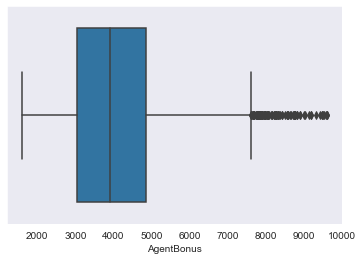

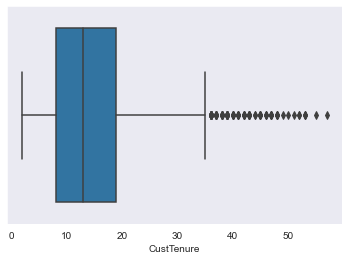

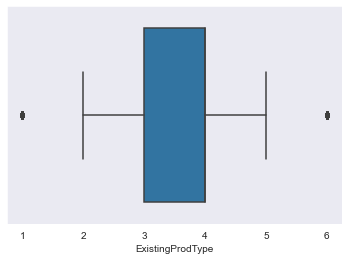

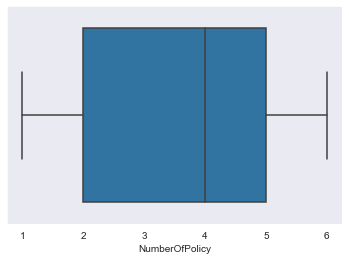

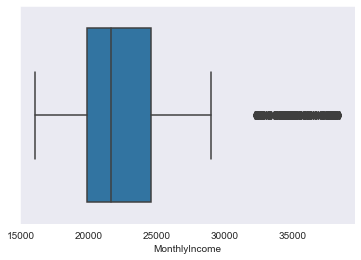

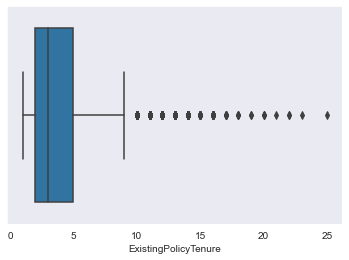

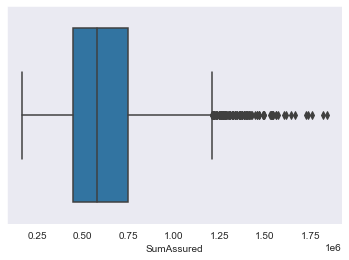

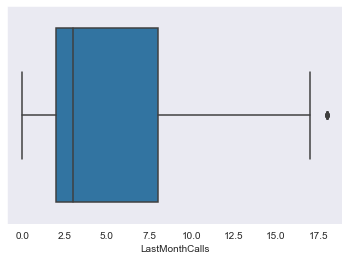

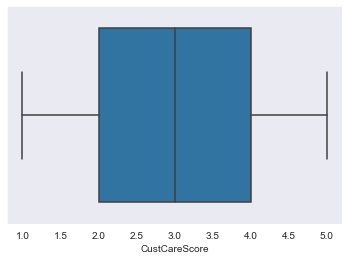

In [31]:
col_names = list(df.select_dtypes(exclude=['category']).columns)
for i,col_val in enumerate(col_names):
    sns.boxplot(df[col_val])
    plt.show()

In [32]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

In [33]:
for i,col_val in enumerate(col_names):
    lwr,upr=remove_outlier(df[col_val])
    df[col_val]=np.where(df[col_val]>upr,upr,df[col_val])
    df[col_val]=np.where(df[col_val]<lwr,lwr,df[col_val])
    print("Outlier is fixed for ", col_val)
df.shape

Outlier is fixed for  AgentBonus
Outlier is fixed for  CustTenure
Outlier is fixed for  ExistingProdType
Outlier is fixed for  NumberOfPolicy
Outlier is fixed for  MonthlyIncome
Outlier is fixed for  ExistingPolicyTenure
Outlier is fixed for  SumAssured
Outlier is fixed for  LastMonthCalls
Outlier is fixed for  CustCareScore


(4520, 13)

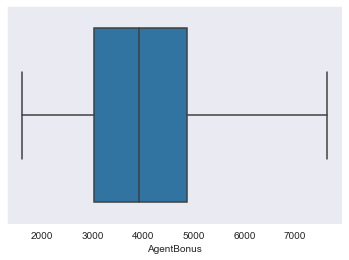

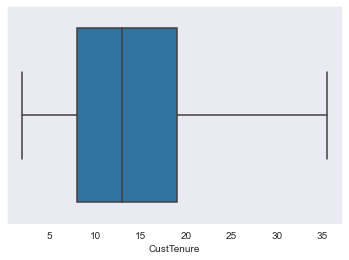

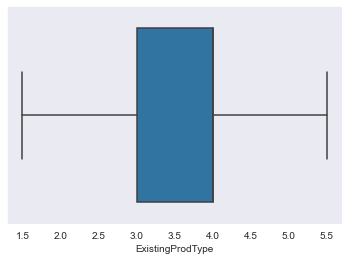

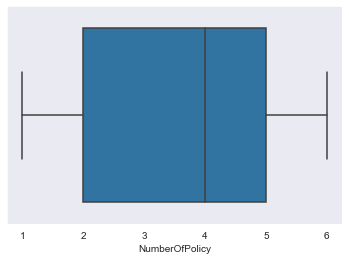

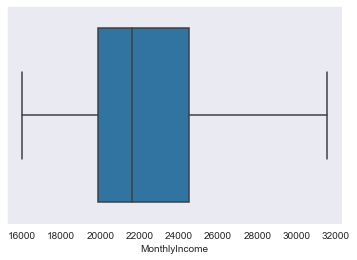

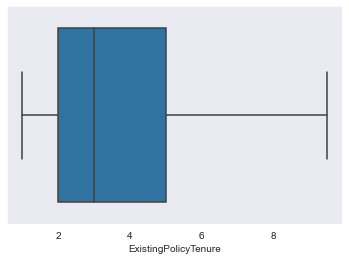

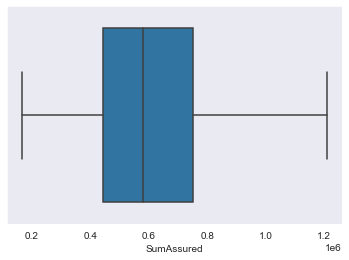

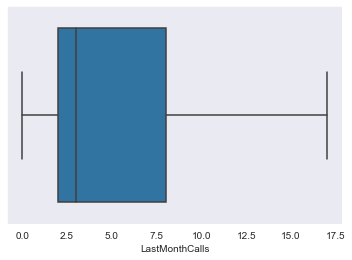

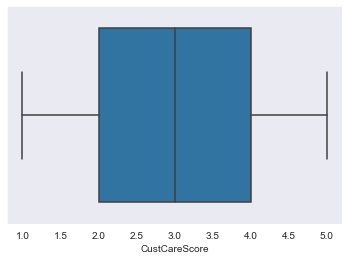

In [34]:
for i,col_val in enumerate(col_names):
    sns.boxplot(df[col_val])
    plt.show()

<AxesSubplot:title={'center':'AgentBonus'}, xlabel='Zone'>

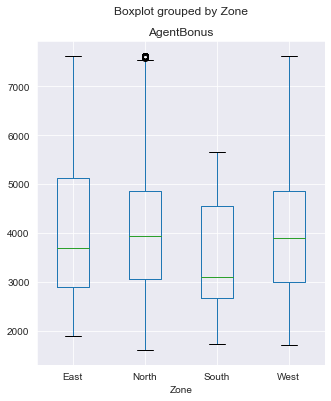

In [35]:
df.boxplot(column='AgentBonus', by='Zone', figsize=(5,6))

<AxesSubplot:title={'center':'AgentBonus'}, xlabel='PaymentMethod'>

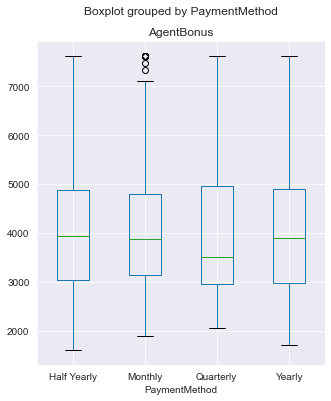

In [36]:
df.boxplot(column='AgentBonus', by='PaymentMethod', figsize=(5,6))

<AxesSubplot:title={'center':'AgentBonus'}, xlabel='Channel'>

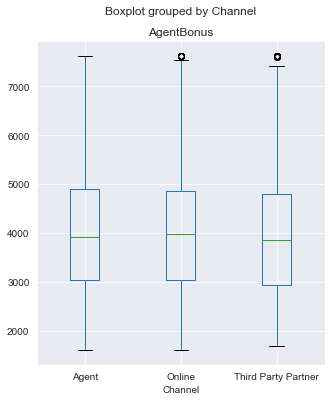

In [37]:
df.boxplot(column='AgentBonus', by='Channel', figsize=(5,6))

<AxesSubplot:title={'center':'AgentBonus'}, xlabel='Complaint'>

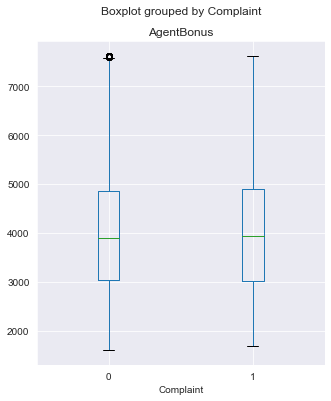

In [38]:
df.boxplot(column='AgentBonus', by='Complaint', figsize=(5,6))

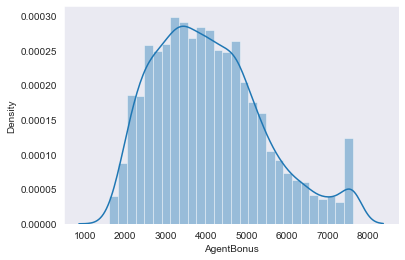

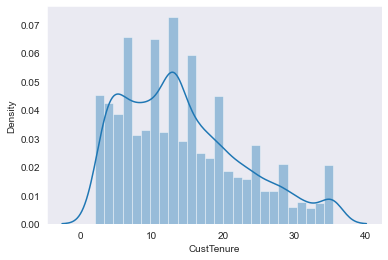

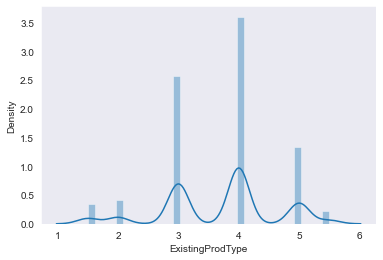

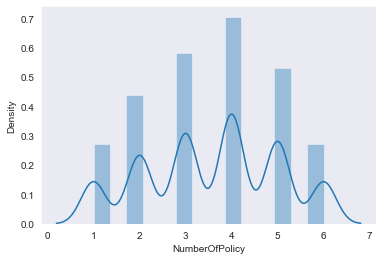

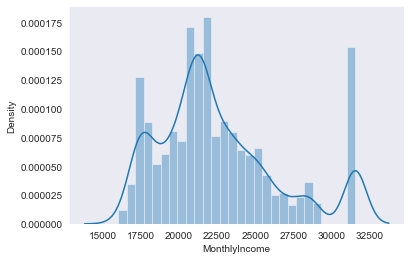

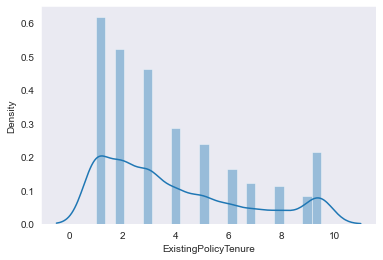

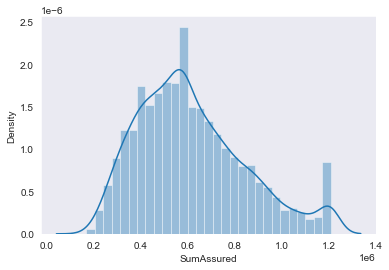

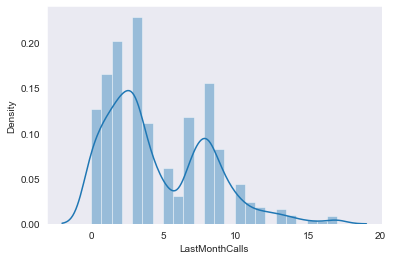

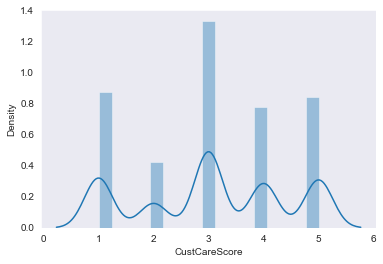

In [39]:
for i,col_val in enumerate(col_names):
    sns.distplot(df[col_val])
    plt.show()

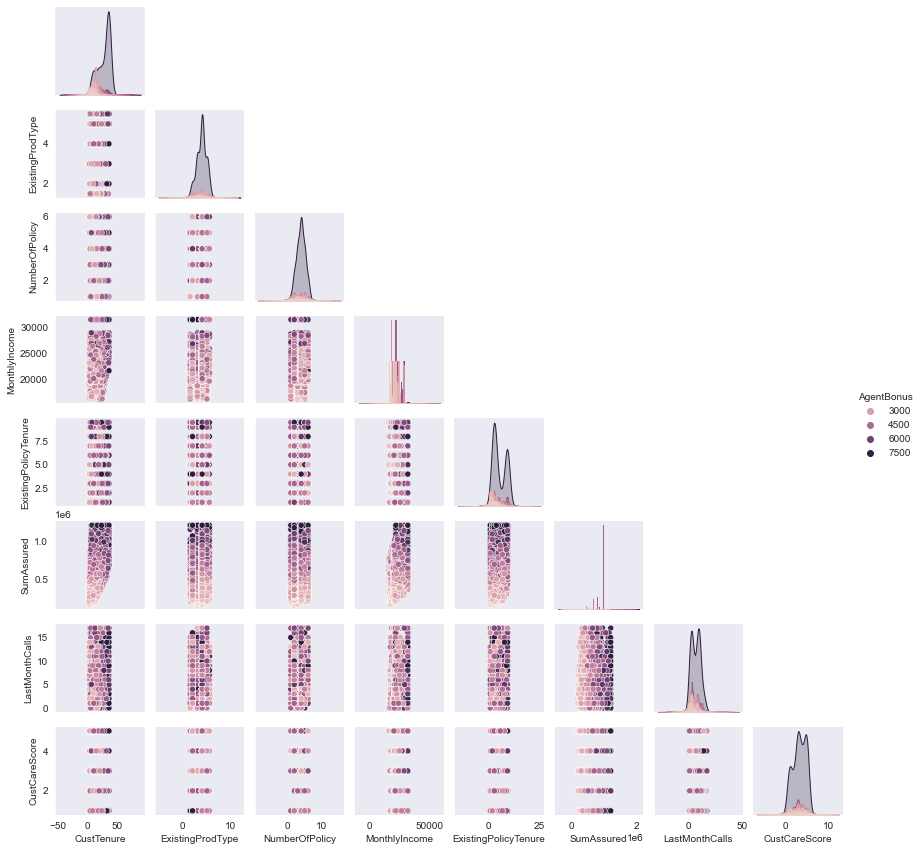

In [40]:
sns.set_style("dark")
sns.pairplot(df,hue="AgentBonus",height=1.5,aspect=1,corner=True)

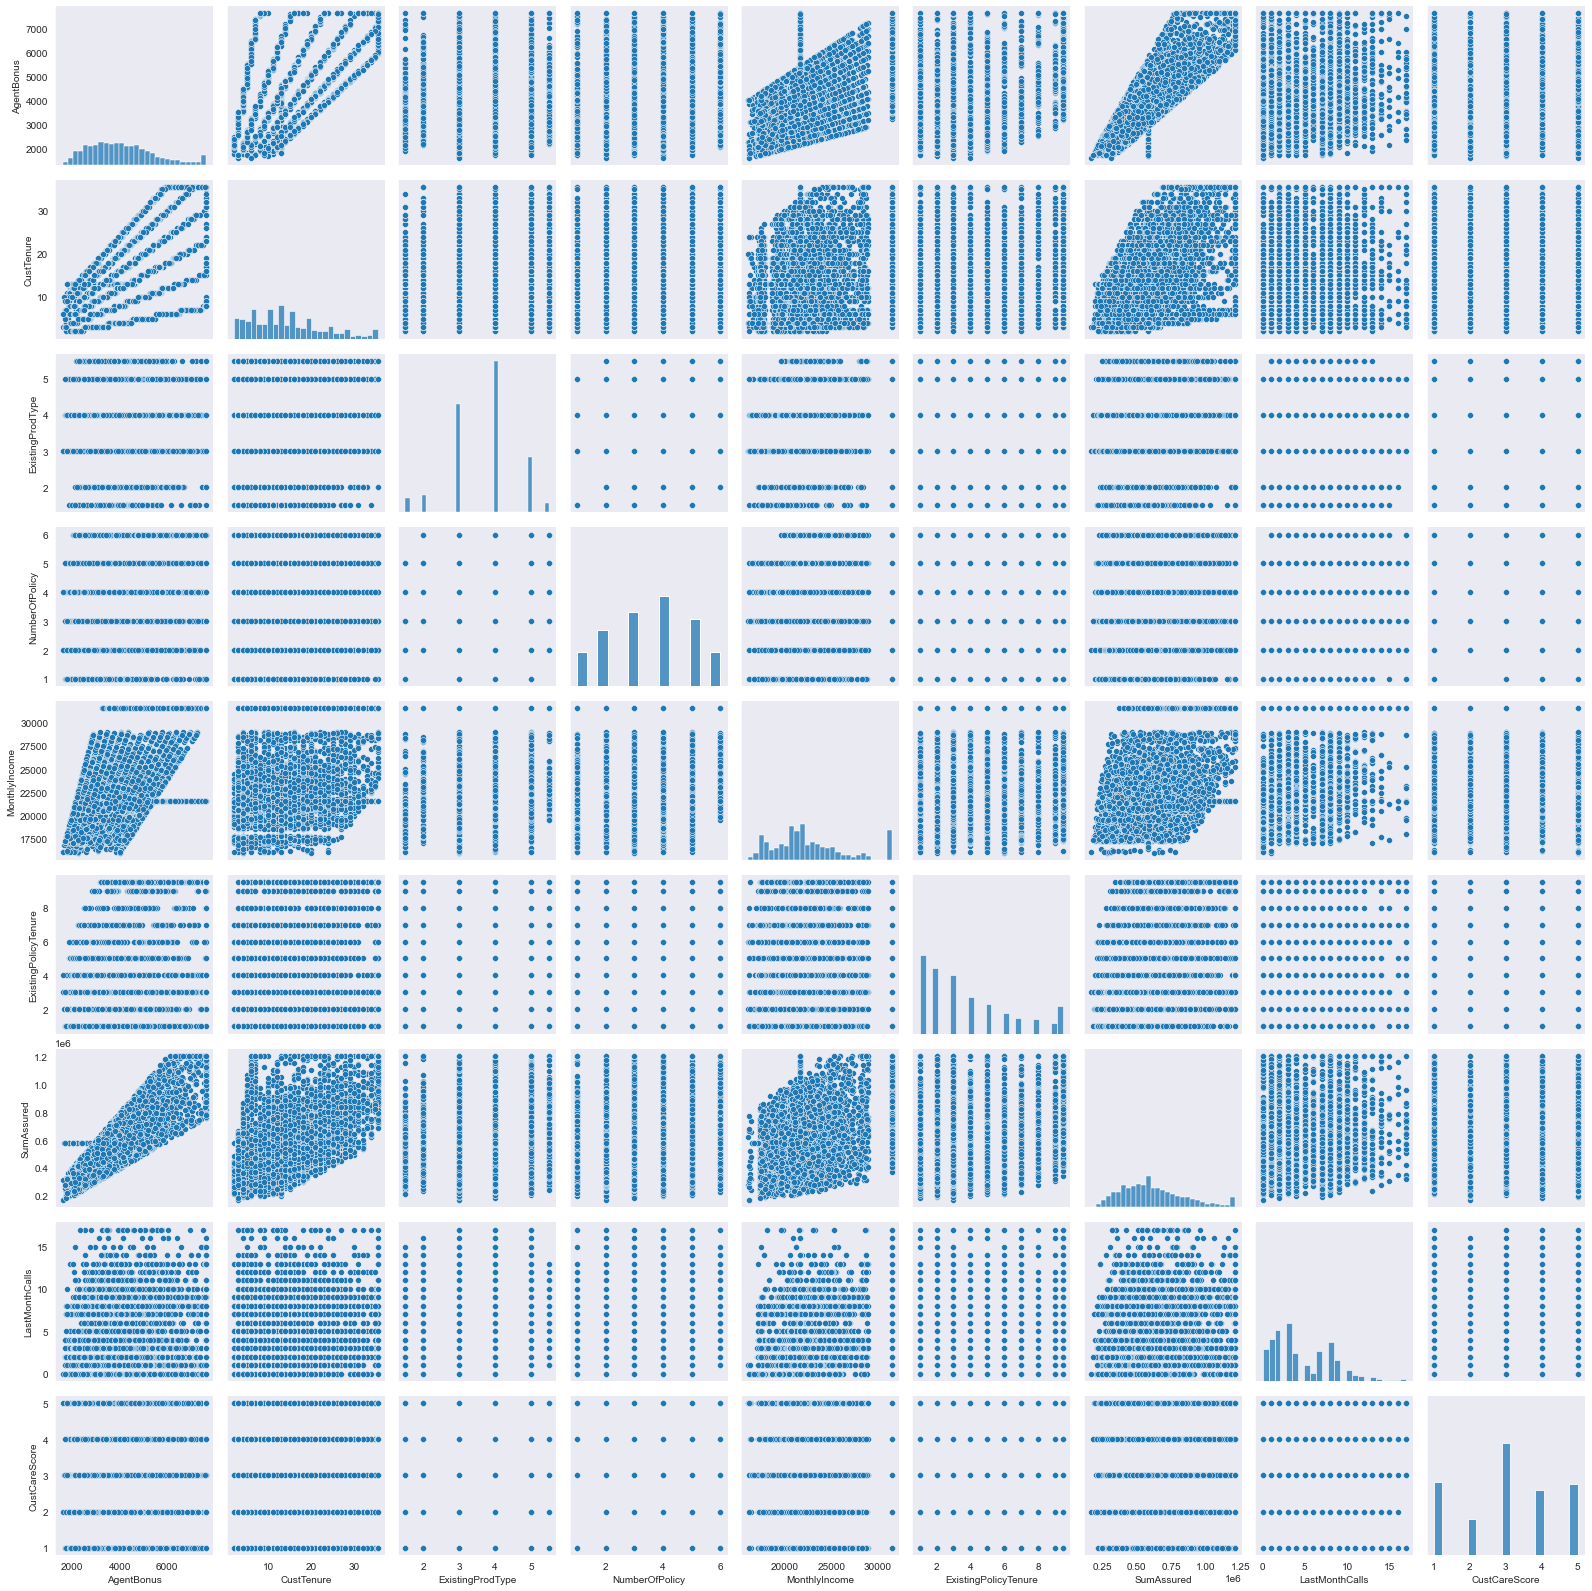

In [41]:
sns.pairplot(df)
plt.show()

In [42]:
df.corr()

AgentBonus  CustTenure  ExistingProdType  \
AgentBonus              1.000000    0.539949          0.112871   
CustTenure              0.539949    1.000000          0.082039   
ExistingProdType        0.112871    0.082039          1.000000   
NumberOfPolicy          0.079161    0.044646          0.153253   
MonthlyIncome           0.549530    0.297696          0.205024   
ExistingPolicyTenure    0.326799    0.173660          0.056601   
SumAssured              0.843091    0.459652          0.103145   
LastMonthCalls          0.201466    0.113400          0.033810   
CustCareScore           0.021995    0.010723          0.002997   

                      NumberOfPolicy  MonthlyIncome  ExistingPolicyTenure  \
AgentBonus                  0.079161       0.549530              0.326799   
CustTenure                  0.044646       0.297696              0.173660   
ExistingProdType            0.153253       0.205024              0.056601   
NumberOfPolicy              1.000000       0.142426              0.050434   
MonthlyIncome               0.142426       1.000000              0.126300   
ExistingPolicyTenure        0.050434       0.126300              1.000000   
SumAssured                  0.064148       0.442764              0.287540   
LastMonthCalls              0.075032       0.349362              0.089329   
CustCareScore              -0.001005       0.031627             -0.006154   

                      SumAssured  LastMonthCalls  CustCareScore  
AgentBonus              0.843091        0.201466       0.021995  
CustTenure              0.459652        0.113400       0.010723  
ExistingProdType        0.103145        0.033810       0.002997  
NumberOfPolicy          0.064148        0.075032      -0.001005  
MonthlyIncome           0.442764        0.349362       0.031627  
ExistingPolicyTenure    0.287540        0.089329      -0.006154  
SumAssured              1.000000        0.156542       0.003604  
LastMonthCalls          0.156542        1.000000       0.006126  
CustCareScore           0.003604        0.006126       1.000000

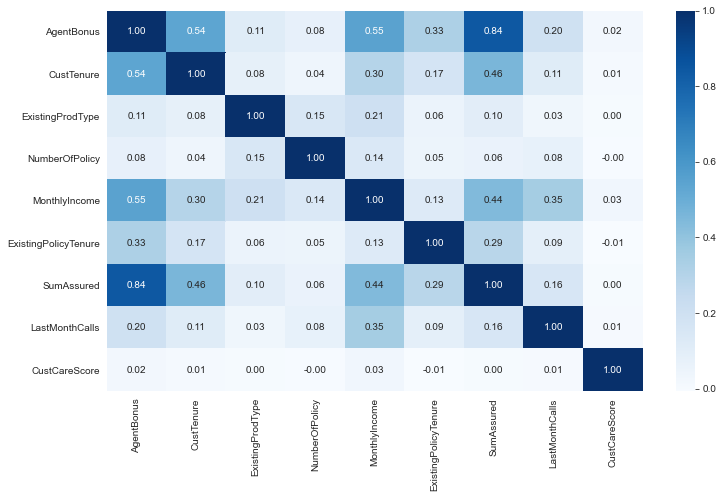

In [43]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

In [44]:
print("MEDIAN OF AgentBonus",df['AgentBonus'].median())
print("MEAN OF AgentBonus",df['AgentBonus'].mean())
print("MODE OF AgentBonus",df['AgentBonus'].mode())

MEDIAN OF AgentBonus 3911.5
MEAN OF AgentBonus 4062.77389380531
MODE OF AgentBonus 0    7626.5
dtype: float64
